<a href="https://colab.research.google.com/github/ocriado91/SalesmanProblemGA/blob/1-create-google-colab-notebook-with-code-and-introduction-to-ga/SalesmanProblemGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salesman Problem using Genetic Algorithms

<p align="center">
<img width=200px src="https://drive.google.com/uc?export=view&id=1PFCZg_MfegudSuZ9foSByELWZT9aBwlq">
</p>

In this notebook, we are going to resolve the _Salesman Problem_ using _Genetic Algorithms_ explaining step to step each stage of the algorithm and a brief introduction to the _Genetic Algorithms_



## The Traveling Salesman Problem (TSP)

This is a classic problem in computer science and mathematics. It asks the question: given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

Imagine a salesperson who needs to visit a bunch of cities to make sales. They want to find the most efficient route that allows them to visit every city exactly once and get back to their starting point, minimizing travel time or distance. This is the essence of the TSP.

## Introduction to Genetic Algorithms

A _Genetic Algorithm_ (GA) is a search heuristic that is inspired by Charles Darwin's theory of natural selection where the fittest individuals are selected for reprduction in order to produce offspring of the next generation. If the parents are the fittest from a set of individuals, they are going to produce offspring which inherit their characteristics and will be added to the next generation and their offspring will be better chance of surviving.

## Hands-on


### Imports

In [ ]:
import random
import matplotlib.pyplot as plt

### Constants

In [ ]:
POPULATION_SIZE = 10
MUTATION_RATE = 0.01
NUM_GENERATIONS = 2

### City class

The first step is to create a __City__ class with coordinates (X,Y) where our Travelling Salesman must be visit. Also, we are going to create a couple of methods to compute the distance between the current city and another one, and a method to plot the city into a 2D plot:


In [ ]:
class City:
  '''
  City to be visited from the Salesman
  '''

  def __init__(self, name, x_pos, y_pos):
    self.name = name
    self.x_pos = x_pos
    self.y_pos = y_pos

  def distance_to(self, another_city) -> float:
    '''
    Compute the cartesian distance between
    the current city and another_city
    '''

    x_diff = abs(self.x_pos - another_city.x_pos)
    y_diff = abs(self.y_pos - another_city.y_pos)
    return (x_diff**2 + y_diff**2) ** 0.5

  def plot_city(self):
    '''
    Plot the position of current city
    into a 2D cartesian plot
    '''

    plt.scatter(self.x_pos, self.y_pos, label=self.name)


And now we can create the set of Cities where our Salesman must be to visit in her journey:


In [13]:
cities = [
        City('A', 1, 1),
        City('B', 1, 2),
        City('C', 2, 3),
        City('D', 3, -1),
        City('E', 4, 5),
        City('F', 3, 2),
    ]

Also, we are going to create a plot with the trajectories performed for the Salesman:

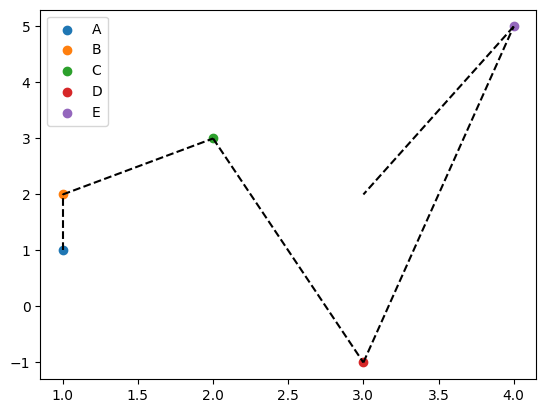

In [24]:
def compute_trajectories(cities: list[City]) -> None:

  for idx in range(len(cities)-1):
    current_city = cities[idx]
    next_city = cities[idx + 1]

    plt.plot([current_city.x_pos, next_city.x_pos],
             [current_city.y_pos, next_city.y_pos],
             color="black",
             linestyle="--")


compute_trajectories(cities)

### Genetic Algorithm

A _Genetic Algorithm_ is compound by five stages:


#### 1. Initial population
Genetic algorithms start with a random initial population:

In [ ]:
def initial_population()-> list:
  population = []
  for _ in range(POPULATION_SIZE):
    individual = random.sample(cities, len(cities))
    population.append(individual)
  return population

# Call to the previous function
population = initial_population()


#### 2. Selection

Selection is the process of choosing chromosomes to use as parents for the next generation based into a _fitness function_:

In [ ]:
def fitness_function(individual: list[City]) -> float:
  '''
  This function computes the fitness score within
  an individual set of cities
  '''
  try:
    total_distance = 0
    for idy in range(len(individual)-1):
      current_city = individual[idy]
      next_city = individual[idy+1]
      total_distance += current_city.distance_to(next_city)
    score = 1/total_distance
    return score
  except ZeroDivisionError:
    return 10000


In [ ]:
def selection(population: list):
  weights = []
  for idx in range(len(population)):
    individual = population[idx]
    score = fitness_function(individual)
    weights.append(score)

  # Copy population variable into a new one
  selection_population = population[:]
  sample = []
  for _ in range(2):
    while True:
      selected = random.choices(selection_population,
                                weights=weights)[0]
      # Detect duplicate city into selected set
      if len(set(selected)) != len(selection_population[0]):
        #print("Detected duplicated items:", [x.name for x in selected])
        continue

      sample.append(selected)
      # Remove selected parent from population
      # and weights list
      index = selection_population.index(selected)
      selection_population.pop(index)
      weights.pop(index)
      break

  parent1 = sample[0]
  parent2 = sample[1]

  return parent1, parent2

parent1, parent2 = selection(population)

#### 3. Crossover

Crossover combines the chromosomes of parents to form children. There are several crossover schemas, but for simplify, we are going to implement a random parent selection to avoid duplicated genes into the child:


In [ ]:
def crossover(parent1: list[City],
              parent2: list[City]) -> list:
  crossover_point = random.randint(0, len(parent1)-1)

  if crossover_point % 2 == 0:
    return parent1
  else:
    return parent2

child = crossover(parent1, parent2)


#### 4. Mutation
In childs were produced only through crossover, many traits that were not present in the initial random population could new occur. Mutation allows new traits to spontaneously appear, allowing the genetic algorithm to explore more of the state space:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1IA0xVlbVfmmvi9i3Ty8UfF8wqkLKEiSc">
</p>

In [ ]:
def mutation(child: list) -> list:
  previous_child = child[:]
  for idx in range(len(child)):
    if random.random() < MUTATION_RATE:
      mutant_index = random.randint(0, len(cities)-1)
      child[idx] = previous_child[mutant_index]
      child[mutant_index] = previous_child[idx]
  return child

print("Incoming child:", [x.name for x in child])
child = mutation(child)
print("Mutant child:", [x.name for x in child])

Incoming child: ['E', 'F', 'A', 'C', 'B', 'D']
Mutant child: ['E', 'F', 'A', 'C', 'B', 'D']


### Iterative process


In [ ]:
def compute_total_distance(cities: list[City]) -> float:
  '''
  Compute the total distance between cities
  '''

  total_distance = 0
  for idx in range(len(cities)-1):
    current_city = cities[idx]
    next_city = cities[idx+1]
    total_distance += current_city.distance_to(next_city)

  return total_distance

In [ ]:
# Create an initial population
population = initial_population()

# Run generation by generation
count = 0
for generation in range(NUM_GENERATIONS):
  print("Starting generation:", generation)
  new_population = []
  for _ in range(len(population)):
    parent1, parent2 = selection(population)
    child = crossover(parent1, parent2)
    child = mutation(child)
    print("+++++++++++++++++++++++++++++++++++++++++++")
    print("Child after mutation:", [x.name for x in child])
    compute_trajectories(child)
    new_population.append(child)
    print("Fitness score: ", fitness_function(child))
    print("Total distance: ", compute_total_distance(child))

  population += new_population

best_individual = max(population, key=fitness_function)

print("+++++++++++++++++++++++++++++++++++++++++++")
print("Best individual:", [x.name for x in best_individual])
print("Best fitness score:", fitness_function(best_individual))
print("Total best distance: ", compute_total_distance(best_individual))
print("+++++++++++++++++++++++++++++++++++++++++++")


Starting generation: 0
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['E', 'B', 'A', 'C', 'F', 'D']
Fitness score:  0.08408362393309868
Total distance:  11.89292222699217
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['D', 'A', 'B', 'C', 'E', 'F']
Fitness score:  0.08902067531792422
Total distance:  11.233345472033855
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['F', 'E', 'B', 'D', 'C', 'A']
Fitness score:  0.05757170639582691
Total distance:  17.369643225869105
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['E', 'B', 'D', 'A', 'F', 'C']
Fitness score:  0.06979876709002292
Total distance:  14.326900627202349
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['E', 'F', 'D', 'C', 'A', 'B']
Fitness score:  0.0739565583995598
Total distance:  13.52145126328583
+++++++++++++++++++++++++++++++++++++++++++
Child after mutation: ['D', 'B', 'E', 'A', 'C', 'F']
Fitness score:  0.06061166809469544
To

## References
- [Introduction to Genetic Algorithms. Vijini Mallawaarachchi.](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)
- Mykel J. Kochenderfer and Tim A. Wheeler (2019).
Algorithms for Optimization.
Massachusetts Institute of Technology, 148-156.